# Анализ влияния кэшбэка на использование сервиса аренды самокатов

**Цель анализа**: Изучить, как кэшбэк влияет на частоту использования сервиса (количество поездок, сумма заказов, активность).

**Данные**: 396,749 записей (апрель–октябрь 2024), 25 столбцов (заказы, пользователи, демография, финансы, поведение).

**Методика**:
- Корреляция Спирмена для оценки взаимосвязей.
- Группировка пользователей по уровню кэшбэка.
- Визуализации (тепловая карта, графики рассеяния, гистограмма).

**Ожидаемые результаты**: Подтвердить, что кэшбэк стимулирует частоту поездок и выявить дополнительные зависимости.

In [3]:
# Загрузка библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Загрузка данных
df = pd.read_csv('kicksharing.csv')  

In [18]:
df.head() # Осмотр данных

,order_rk,party_rk,gender_cd,age,education_level_cd,marital_status_cd,lvn_state_nm,minute_cost,activation_cost,hold_amount,transport_model,distance_km,created_dttm,book_start_dttm,book_end_dttm,book_time_zone_cd,local_book_start_dttm,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
0,266071307,761067705,M,40,UGR,DIV,ТЮМЕНСКАЯ ОБЛ,4.99,30.0,300.0,SL,3.690479,2024-08-07 09:47:25.000000,2024-08-07 09:47:29.325252,2024-08-07 10:07:59.339524,5,2024-08-07 11:47:29.325252,134.79,19.48,NaN
1,355113920,614049469,F,30,GRD,MAR,РОСТОВСКАЯ ОБЛ,8.49,50.0,300.0,SL,1.114912,2024-10-17 14:57:20.000000,2024-10-17 14:57:24.586000,2024-10-17 15:04:19.419607,3,2024-10-17 14:57:24.586000,109.43,40.30,NaN
2,347424551,757583701,M,28,UGR,UNM,СВЕРДЛОВСКАЯ ОБЛ,5.99,30.0,300.0,E,1.515612,2024-09-19 05:31:41.000000,2024-09-19 05:34:59.476000,2024-09-19 05:41:50.164372,5,2024-09-19 07:34:59.476000,71.93,10.79,NaN
3,351562959,541367366,M,24,GRD,UNM,Г МОСКВА,8.99,50.0,300.0,SL,0.499411,2024-10-04 16:05:09.000000,2024-10-04 16:05:13.162000,2024-10-04 16:07:31.724918,3,2024-10-04 16:05:13.162000,76.97,7.70,NaN
4,258647149,238473615,M,34,NaN,NaN,Г МОСКВА,6.99,50.0,300.0,SL,2.602028,2024-07-10 06:57:40.000000,2024-07-10 06:57:43.017125,2024-07-10 07:07:48.446462,3,2024-07-10 06:57:43.017125,126.89,25.38,NaN


In [19]:
df.info() # Осмотр типов данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396749 entries, 0 to 396748
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   order_rk                 396749 non-null  int64  
 1   party_rk                 396749 non-null  int64  
 2   gender_cd                393828 non-null  object 
 3   age                      396749 non-null  int64  
 4   education_level_cd       190059 non-null  object 
 5   marital_status_cd        217729 non-null  object 
 6   lvn_state_nm             362572 non-null  object 
 7   minute_cost              396749 non-null  float64
 8   activation_cost          396749 non-null  float64
 9   hold_amount              396749 non-null  float64
 10  transport_model          396749 non-null  object 
 11  distance_km              396749 non-null  float64
 12  created_dttm             396749 non-null  object 
 13  book_start_dttm          396749 non-null  object 
 14  book

In [20]:
df.describe() # Осмотр описательных статистик 

,order_rk,party_rk,age,minute_cost,activation_cost,hold_amount,distance_km,book_time_zone_cd,nominal_price_rub_amt,loyalty_accrual_rub_amt,loyalty_accrual_bns_amt
count,3.967490e+05,3.967490e+05,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,396749.000000,366992.000000,21948.000000
mean,2.892236e+08,5.988426e+08,31.544006,7.288688,42.593226,299.983869,3.681031,3.536155,127.647694,37.516121,127.789319
std,3.813458e+07,3.311675e+08,9.434545,1.289492,11.989974,1.939153,141.862349,1.209075,100.122365,75.208560,496.812143
min,2.526112e+08,1.471700e+04,12.000000,1.500000,0.000000,80.000000,0.000000,0.000000,0.000000,-161.940000,1.000000
25%,2.618150e+08,2.962323e+08,24.000000,6.490000,30.000000,300.000000,0.941054,3.000000,80.840000,11.240000,43.000000
50%,2.704367e+08,6.110092e+08,31.000000,7.490000,50.000000,300.000000,1.729883,3.000000,103.940000,18.730000,62.000000
75%,3.432678e+08,8.646921e+08,37.000000,8.220000,50.000000,300.000000,3.063694,3.000000,142.100000,35.060000,81.000000
max,3.562528e+08,1.301075e+09,94.000000,19.990000,50.000000,500.000000,56012.640308,12.000000,5627.640000,3185.000000,55429.360970


In [21]:
df.isna().sum()

order_rk                        0
party_rk                        0
gender_cd                    2921
age                             0
education_level_cd         206690
marital_status_cd          179020
lvn_state_nm                34177
minute_cost                     0
activation_cost                 0
hold_amount                     0
transport_model                 0
distance_km                     0
created_dttm                    0
book_start_dttm                 0
book_end_dttm                   0
book_time_zone_cd               0
local_book_start_dttm           0
nominal_price_rub_amt           0
loyalty_accrual_rub_amt     29757
loyalty_accrual_bns_amt    374801
dtype: int64

## Выводы по осмотру данных
- **Объем данных**: 396,749 записей, 25 столбцов.
- **Ключевые метрики**:
  - Средний возраст: 31.5 лет (диапазон 12–94).
  - Средняя стоимость поездки: 127.65 руб., средний кэшбэк: 41.77 руб.
  - Средняя длительность поездки: 11.44 мин, расстояние: 3.68 км.
- **Проблемы**:
  - Пропуски в `education_level_cd` (52%), `marital_status_cd` (45%), `lvn_state_nm` (8%).
  - Выбросы: `total_cashback` до 55,429 руб., `distance_km` до 56,012 км, `trip_duration_min` до 715 мин.


In [4]:
# Обработка пропущенных значений

# Категориальные столбцы: замена на моду
df['gender_cd'] = df['gender_cd'].fillna(df['gender_cd'].mode())

# Категориальные столбцы: замена на "Unknown"
df['education_level_cd'] = df['education_level_cd'].fillna('Unknown')
df['marital_status_cd'] = df['marital_status_cd'].fillna('Unknown')
df['lvn_state_nm'] = df['lvn_state_nm'].fillna('Unknown')

# Числовые столбцы: замена на 0 (для кэшбэка, так как пропуски, вероятно, означают отсутствие начислений)
df['loyalty_accrual_rub_amt'] = df['loyalty_accrual_rub_amt'].fillna(0)
df['loyalty_accrual_bns_amt'] = df['loyalty_accrual_bns_amt'].fillna(0)

# Столбцы без пропусков (оставляем для единообразия, но они уже заполнены)
df['nominal_price_rub_amt'] = df['nominal_price_rub_amt'].fillna(0)
df['hold_amount'] = df['hold_amount'].fillna(0)
df['distance_km'] = df['distance_km'].fillna(0)

# Создаем столбец для общего кэшбэка (рубли + бонусы)
df['total_cashback'] = df['loyalty_accrual_rub_amt'] + df['loyalty_accrual_bns_amt']

# Преобразование дат
df['book_start_dttm'] = pd.to_datetime(df['book_start_dttm'])
df['book_end_dttm'] = pd.to_datetime(df['book_end_dttm'])

## Выводы по обработке данных
- **Категориальные столбцы** (`education_level_cd`, `marital_status_cd`, `lvn_state_nm`):
  - Пропуски ( заменены на `"Unknown"`, чтобы сохранить информацию без искажения демографии.
  `gender_cd` заменен на моду, так как там мало пропусков
- **Числовые столбцы**:
  - `loyalty_accrual_bns_amt` (94.4% пропусков): Заменены на 0. Вероятно, бонусы не начисляются при оплате дебетовыми картами, которые преобладают среди пользователей.
- `loyalty_accrual_rub_amt` (7.5% пропусков): Заменены на 0, так как пропуски, скорее всего, означают отсутствие начислений. Либо использовалась кредитная карта


- **Создание метрик**:
  - Сформирован столбец `total_cashback` как сумма рублей и бонусов.
  - Даты преобразованы в формат `datetime` для анализа временных метрик.


## Выводы по обработке данных
- Пропуски в числовых столбцах (`loyalty_accrual_rub_amt`, `nominal_price_rub_amt` и др.) заполнены нулями.
- Создан столбец `total_cashback` как сумма рублей и бонусов.
- Даты преобразованы в формат `datetime` для анализа временных метрик.

In [5]:
# Расчет метрик по пользователям

# Активность
user_activity = df.groupby('party_rk').agg({
    'order_rk': 'nunique',
    'book_start_dttm': lambda x: x.dt.date.nunique()
}).reset_index()
user_activity.columns = ['party_rk', 'order_count', 'unique_days']
user_activity['trips_per_month'] = user_activity['order_count'] / 7
user_activity['active_days_ratio'] = user_activity['unique_days'] / 214

# Финансовые метрики
user_finance = df.groupby('party_rk').agg({
    'nominal_price_rub_amt': 'sum',
    'total_cashback': 'sum',
    'hold_amount': 'sum'
}).reset_index()
user_finance.columns = ['party_rk', 'total_order_amount', 'total_cashback', 'total_hold_amount']

# Поведенческие метрики
df['trip_duration_min'] = (df['book_end_dttm'] - df['book_start_dttm']).dt.total_seconds() / 60
df['trip_hour'] = df['book_start_dttm'].dt.hour
user_behavior = df.groupby('party_rk').agg({
    'trip_duration_min': 'mean',
    'distance_km': ['sum', 'count'],
    'trip_hour': lambda x: x.mode()[0] if not x.empty else None,
    'transport_model': lambda x: x.mode()[0] if not x.empty else None
}).reset_index()
user_behavior.columns = ['party_rk', 'avg_trip_duration', 'total_distance', 'trip_count', 'most_common_hour', 'most_common_model']
user_behavior['avg_distance_per_trip'] = user_behavior['total_distance'] / user_behavior['trip_count']

# Демографические метрики
bins = [0, 25, 35, 100]
labels = ['<25', '25-35', '>35']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
user_demographics = df.groupby('party_rk').agg({
    'age_group': 'first',
    'gender_cd': 'first',
    'lvn_state_nm': 'first',
    'marital_status_cd': 'first'
}).reset_index()
user_demographics.columns = ['party_rk', 'age_group', 'gender', 'region', 'marital_status']

# Лояльность
df['trip_month'] = df['book_start_dttm'].dt.month
user_loyalty = df.groupby('party_rk').agg({
    'trip_month': 'nunique',
    'book_start_dttm': 'min'
}).reset_index()
user_loyalty.columns = ['party_rk', 'active_months', 'first_trip_date']
season_start = pd.to_datetime('2024-04-01')
user_loyalty['days_to_first_trip'] = (user_loyalty['first_trip_date'] - season_start).dt.days

# Объединение метрик
user_metrics = user_activity.merge(user_finance, on='party_rk', suffixes=('_activity', '_finance')) \
                           .merge(user_behavior, on='party_rk', suffixes=('', '_behavior')) \
                           .merge(user_demographics, on='party_rk', suffixes=('', '_demo')) \
                           .merge(user_loyalty, on='party_rk', suffixes=('', '_loyalty'))
user_metrics['avg_trip_cost'] = user_metrics['total_order_amount'] / user_metrics['order_count']
user_metrics['cashback_ratio'] = user_metrics['total_cashback'] / user_metrics['total_order_amount'].replace(0, 1)
user_metrics['avg_cashback_per_trip'] = user_metrics['total_cashback'] / user_metrics['order_count']
user_metrics['repeat_trip_ratio'] = (user_metrics['order_count'] - 1) / user_metrics['order_count'].replace(0, 1)

## Выводы по расчету метрик
- Рассчитаны метрики для каждого пользователя (`party_rk`):
  - **Активность**: Количество поездок, доля активных дней, поездки в месяц.
  - **Финансовые**: Сумма заказов, кэшбэк, средняя стоимость поездки.
  - **Поведенческие**: Средняя длительность и расстояние поездки, популярное время.
  - **Демографические**: Возрастная группа, пол, регион.
  - **Лояльность**: Активные месяцы, время до первой поездки.
- Данные объединены в таблицу `user_metrics` для дальнейшего анализа.

In [7]:
user_metrics

,party_rk,order_count,unique_days,trips_per_month,active_days_ratio,total_order_amount,total_cashback,total_hold_amount,avg_trip_duration,total_distance,...,gender,region,marital_status,active_months,first_trip_date,days_to_first_trip,avg_trip_cost,cashback_ratio,avg_cashback_per_trip,repeat_trip_ratio
0,14717,1,1,0.142857,0.004673,604.26,211.28,300.0,73.699354,3.263743,...,M,ЛЕНИНГРАДСКАЯ ОБЛ,CIV,1,2024-07-20 15:03:20.255749,110,604.260000,0.349651,211.280000,0.000000
1,15725,4,2,0.571429,0.009346,513.17,157.50,1200.0,9.984202,6.908815,...,M,Г МОСКВА,UNM,2,2024-08-29 10:33:03.269223,150,128.292500,0.306916,39.375000,0.750000
2,22290,6,3,0.857143,0.014019,1239.64,297.83,1800.0,19.091734,24.961698,...,M,Г МОСКВА,CIV,2,2024-07-14 11:48:58.994207,104,206.606667,0.240255,49.638333,0.833333
3,22530,4,4,0.571429,0.018692,588.91,74.90,1200.0,14.304350,10.248125,...,M,СТАВРОПОЛЬСКИЙ КРАЙ,MAR,3,2024-05-20 18:07:17.817487,49,147.227500,0.127184,18.725000,0.750000
4,27063,1,1,0.142857,0.004673,153.80,153.80,300.0,11.421884,1.652186,...,M,ОБЛ ЧЕЛЯБИНСКАЯ,MAR,1,2024-09-09 11:32:12.984000,161,153.800000,1.000000,153.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64047,1300448310,1,1,0.142857,0.004673,209.80,62.94,300.0,19.177140,2.852660,...,M,Г МОСКВА,Unknown,1,2024-10-08 16:31:22.888000,190,209.800000,0.300000,62.940000,0.000000
64048,1300455702,2,1,0.285714,0.004673,195.88,64.46,600.0,5.384492,0.889155,...,M,Г САНКТ-ПЕТЕРБУРГ,Unknown,1,2024-10-15 20:05:47.546000,197,97.940000,0.329079,32.230000,0.500000
64049,1300625360,1,1,0.142857,0.004673,140.70,49.25,300.0,9.275272,0.952323,...,M,Г МОСКВА,Unknown,1,2024-10-19 12:29:48.526000,201,140.700000,0.350036,49.250000,0.000000
64050,1300923278,1,1,0.142857,0.004673,98.96,34.64,300.0,5.675952,1.311490,...,M,Г МОСКВА,Unknown,1,2024-10-18 20:12:46.666000,200,98.960000,0.350040,34.640000,0.000000


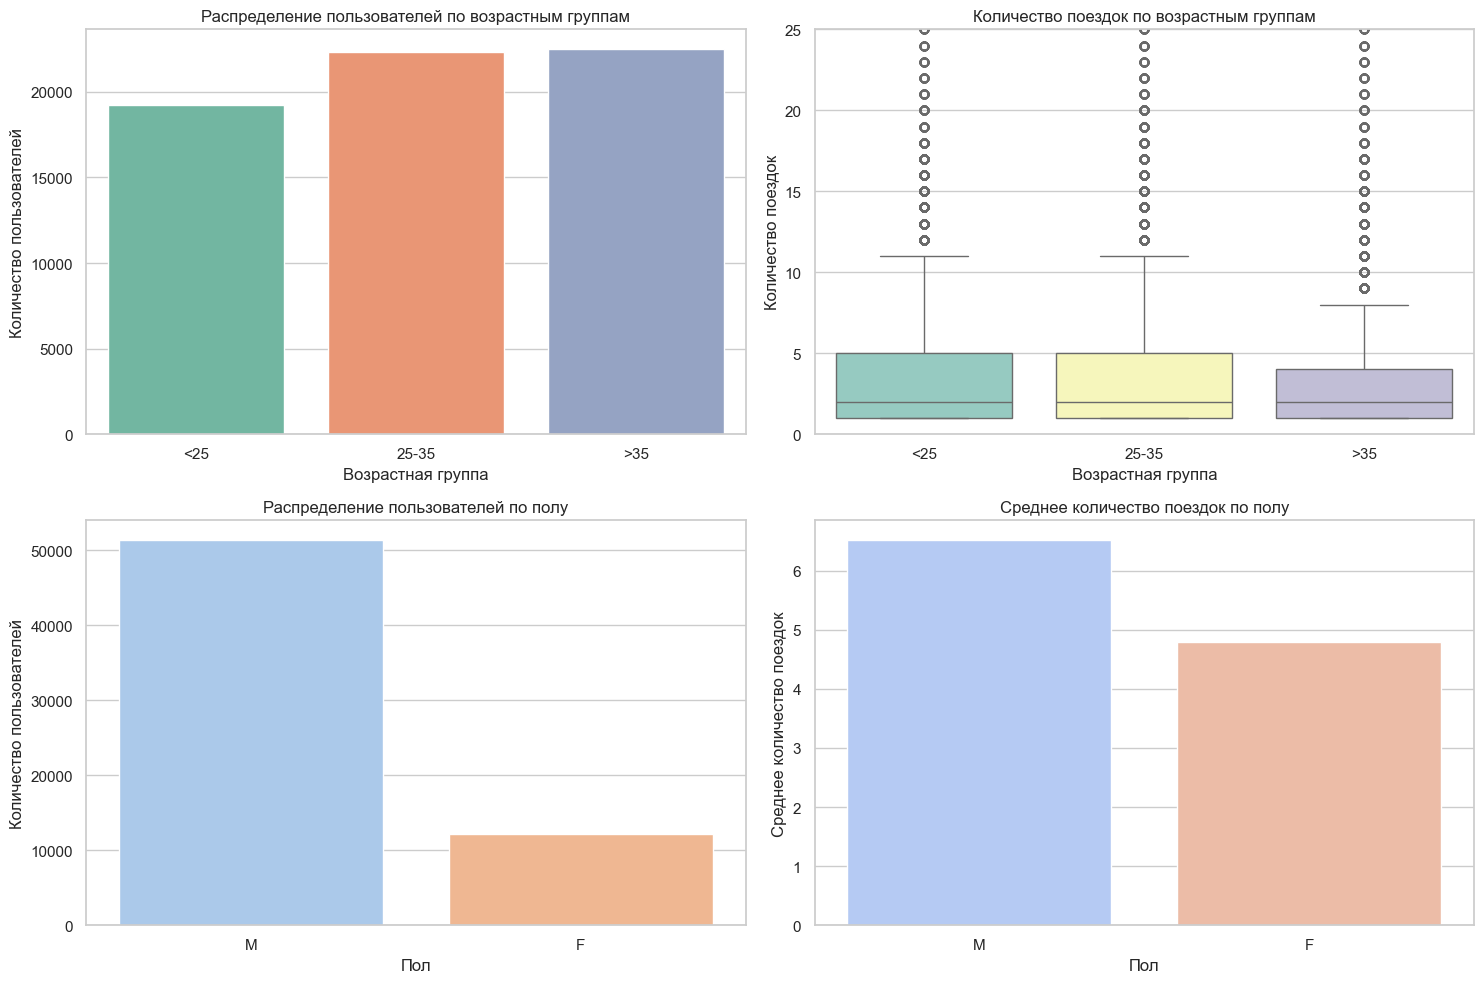

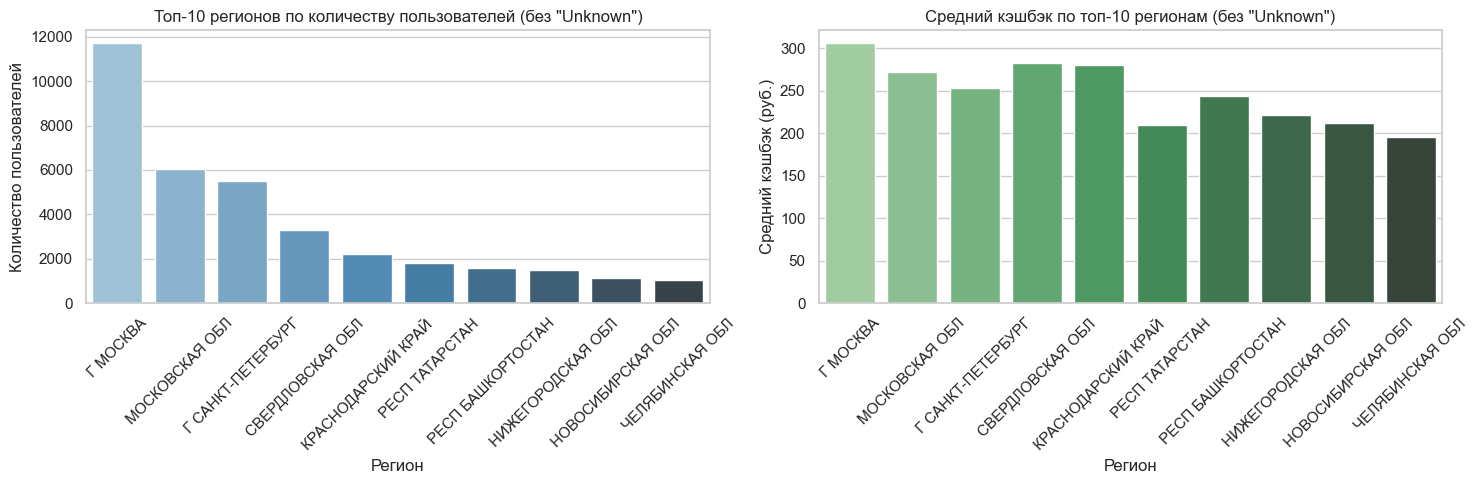

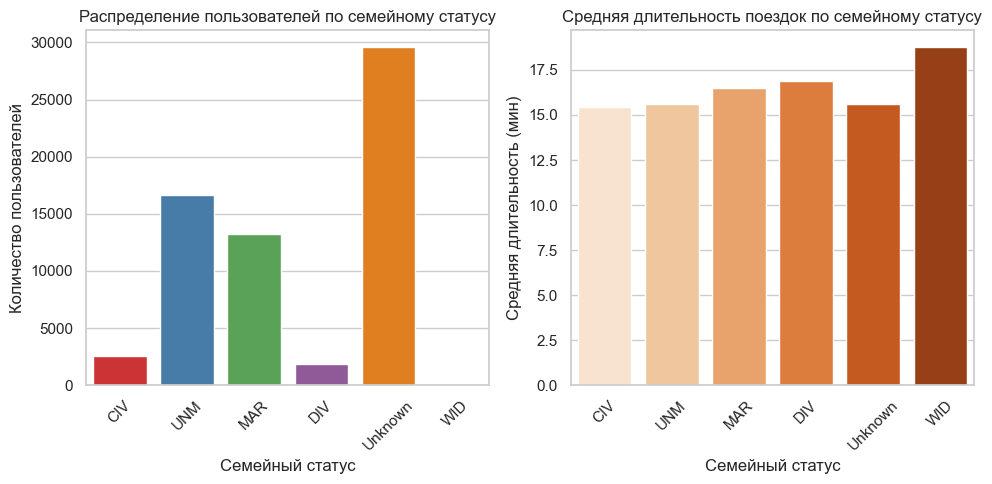

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Устанавливаем стиль
sns.set(style="whitegrid")

# Визуализации по демографическим данным
plt.figure(figsize=(15, 10))

# 1. Распределение по возрастным группам
plt.subplot(2, 2, 1)
sns.countplot(x='age_group', hue='age_group', data=user_metrics, palette='Set2', legend=False)
plt.title('Распределение пользователей по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество пользователей')

# 2. Boxplot количества поездок по возрастным группам
plt.subplot(2, 2, 2)
sns.boxplot(x='age_group', y='order_count', hue='age_group', data=user_metrics, palette='Set3', legend=False)
plt.title('Количество поездок по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Количество поездок')
plt.ylim(0, 25)

# 3. Распределение по полу
plt.subplot(2, 2, 3)
sns.countplot(x='gender', hue='gender', data=user_metrics, palette='pastel', legend=False)
plt.title('Распределение пользователей по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пользователей')

# 4. Среднее количество поездок по полу
plt.subplot(2, 2, 4)
sns.barplot(x='gender', y='order_count', hue='gender', data=user_metrics, estimator='mean', errorbar=None, palette='coolwarm', legend=False)
plt.title('Среднее количество поездок по полу')
plt.xlabel('Пол')
plt.ylabel('Среднее количество поездок')

plt.tight_layout()
plt.show()

# Дополнительные визуализации (регионы и семейный статус)

# Фильтруем 'Unknown' перед подсчётом top-10 регионов
filtered_regions = user_metrics[user_metrics['region'] != 'Unknown']
top_regions = filtered_regions['region'].value_counts().head(10)

plt.figure(figsize=(15, 5))

# 5. Топ-10 регионов по количеству пользователей (без 'Unknown')
plt.subplot(1, 2, 1)
sns.barplot(x=top_regions.index, y=top_regions.values, hue=top_regions.index, palette='Blues_d', legend=False)
plt.title('Топ-10 регионов по количеству пользователей (без "Unknown")')
plt.xlabel('Регион')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)

# 6. Средний кэшбэк по регионам (только топ-10, без 'Unknown')
region_cashback = (
    filtered_regions
    .groupby('region')['total_cashback']
    .mean()
    .loc[top_regions.index]
)

plt.subplot(1, 2, 2)
sns.barplot(x=region_cashback.index, y=region_cashback.values, hue=region_cashback.index, palette='Greens_d', legend=False)
plt.title('Средний кэшбэк по топ-10 регионам (без "Unknown")')
plt.xlabel('Регион')
plt.ylabel('Средний кэшбэк (руб.)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 7. Распределение по семейному статусу
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x='marital_status', hue='marital_status', data=user_metrics, palette='Set1', legend=False)
plt.title('Распределение пользователей по семейному статусу')
plt.xlabel('Семейный статус')
plt.ylabel('Количество пользователей')
plt.xticks(rotation=45)

# 8. Средняя длительность поездок по семейному статусу
plt.subplot(1, 2, 2)
sns.barplot(x='marital_status', y='avg_trip_duration', hue='marital_status', data=user_metrics,
            estimator='mean', errorbar=None, palette='Oranges', legend=False)
plt.title('Средняя длительность поездок по семейному статусу')
plt.xlabel('Семейный статус')
plt.ylabel('Средняя длительность (мин)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




## Анализ демографических данных пользователей

### 1. Распределение пользователей по возрастным группам

* **Наибольшее количество пользователей** — в возрастных группах **25–35** и **старше 35 лет**.
* Группа **до 25 лет** — немного отстаёт по численности, но также достаточно представлена.

### 2. Количество поездок по возрастным группам (Boxplot)

* Независимо от возраста, **медианное количество поездок** находится на уровне **2–3 поездок**.
* Во всех группах наблюдаются **выбросы** — пользователи с существенно большим числом поездок.


### 3. Распределение пользователей по полу

* Значительное **преобладание мужчин** среди пользователей сервиса.


### 4. Среднее количество поездок по полу

* **Мужчины в среднем совершают больше поездок**, чем женщины.
* Среднее количество поездок у мужчин — около **6.5**, у женщин — **менее 5**.


### 5. Топ-10 регионов по количеству пользователей

* **Наибольшее количество пользователей** — из **Москвы**, с большим отрывом от остальных регионов.
* Далее следуют **Московская область** и **Санкт-Петербург**.
* Остальные регионы представлены значительно меньшим числом пользователей.

### 6. Средний кэшбэк по регионам

* **Наибольший средний кэшбэк** — у пользователей из **города Москвы**.
* В целом средний кэшбэк несильно разнится по регионам


### 7. Распределение пользователей по семейному статусу

* Самая крупная группа — **"Unknown"** (неизвестный статус), что указывает на нехватку данных.
* Из известных категорий: больше всего пользователей — **в незарегистрированных отношениях (UNM)** и **в браке (MAR)**.
* **Вдовцов (WID)** — наименьшее число.

### 8. Средняя длительность поездок по семейному статусу

* Самая длинная средняя поездка — у **вдовцов (WID)**, однако их очень мало, поэтому это нерперезентативно.
* В целом, видно, что семейный статус не влияет на длительность поездок







In [9]:
# Корреляционный анализ (Spearman)
corr_columns = {
    'total_cashback': 'Общий кэшбэк',
    'order_count': 'Количество поездок',
    'total_order_amount': 'Сумма заказов',
    'avg_trip_duration': 'Средняя длительность поездки (мин)',
    'avg_distance_per_trip': 'Среднее расстояние поездки (км)',
    'active_days_ratio': 'Доля активных дней',
    'active_months': 'Активные месяцы'
}
corr_data = user_metrics[corr_columns.keys()].rename(columns=corr_columns)
corr_matrix = corr_data.corr(method='spearman')

print("Корреляционная матрица (Spearman):")
print(corr_matrix)

# Подробные корреляции для кэшбэка
corr_cashback_orders, p_value_orders = spearmanr(user_metrics['total_cashback'], user_metrics['order_count'])
corr_cashback_amount, p_value_amount = spearmanr(user_metrics['total_cashback'], user_metrics['total_order_amount'])
print(f"\nКорреляция (Spearman) между кэшбэком и количеством поездок: {corr_cashback_orders:.3f}, p-value: {p_value_orders:.3f}")
print(f"Корреляция (Spearman) между кэшбэком и суммой заказов: {corr_cashback_amount:.3f}, p-value: {p_value_amount:.3f}")

Корреляционная матрица (Spearman):
                                    Общий кэшбэк  Количество поездок  \
Общий кэшбэк                            1.000000            0.503785   
Количество поездок                      0.503785            1.000000   
Сумма заказов                           0.748648            0.832011   
Средняя длительность поездки (мин)      0.385031           -0.129522   
Среднее расстояние поездки (км)         0.450898            0.029000   
Доля активных дней                      0.500752            0.942860   
Активные месяцы                         0.417393            0.773857   

                                    Сумма заказов  \
Общий кэшбэк                             0.748648   
Количество поездок                       0.832011   
Сумма заказов                            1.000000   
Средняя длительность поездки (мин)       0.343220   
Среднее расстояние поездки (км)          0.374482   
Доля активных дней                       0.801479   
Активные месяцы  

## Выводы по корреляционному анализу
- **Кэшбэк и активность**:
  - Кэшбэк vs Количество поездок: 0.504 (умеренная положительная связь, p<0.001) — кэшбэк стимулирует частоту поездок.
  - Кэшбэк vs Сумма заказов: 0.749 (сильная связь) — пользователи с большим кэшбэком тратят больше.
  - Кэшбэк vs Доля активных дней: 0.501, vs Активные месяцы: 0.417 — кэшбэк повышает регулярность.
- **Другие зависимости**:
  - Количество поездок vs Доля активных дней: 0.943 — очень сильная связь.
  - Средняя длительность vs Количество поездок: -0.130 — частые пользователи делают короткие поездки.
  - Средняя длительность vs Среднее расстояние: 0.739 — длинные поездки связаны с большими расстояниями.
- **Итог**: Кэшбэк мотивирует пользователей чаще пользоваться сервисом, но эффект умеренный.

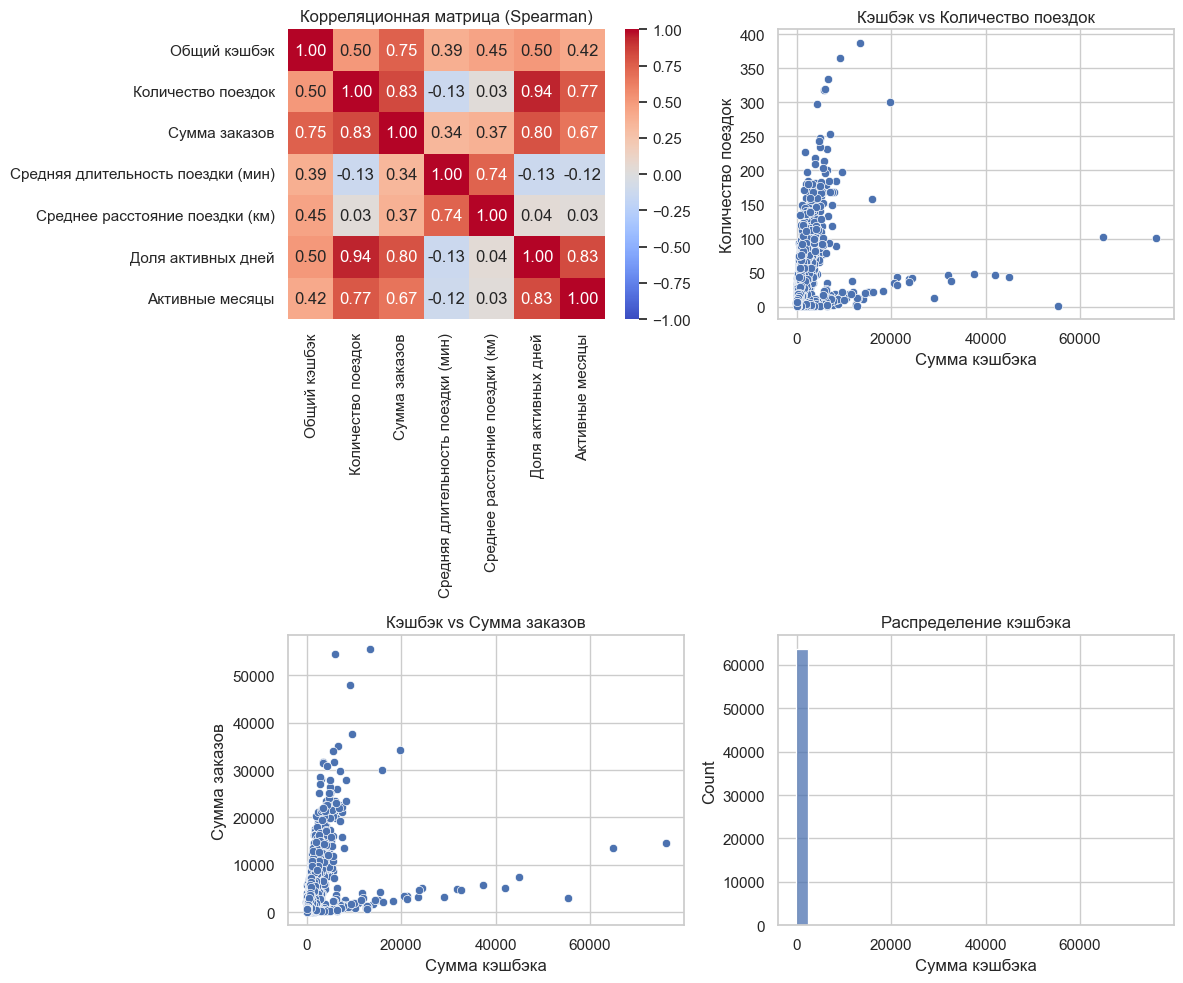

In [10]:
# Визуализации
plt.figure(figsize=(12, 10))

# Тепловая карта корреляций
plt.subplot(2, 2, 1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Корреляционная матрица (Spearman)')

# График рассеяния: Кэшбэк vs Количество поездок
plt.subplot(2, 2, 2)
sns.scatterplot(x='total_cashback', y='order_count', data=user_metrics)
plt.title('Кэшбэк vs Количество поездок')
plt.xlabel('Сумма кэшбэка')
plt.ylabel('Количество поездок')

# График рассеяния: Кэшбэк vs Сумма заказов
plt.subplot(2, 2, 3)
sns.scatterplot(x='total_cashback', y='total_order_amount', data=user_metrics)
plt.title('Кэшбэк vs Сумма заказов')
plt.xlabel('Сумма кэшбэка')
plt.ylabel('Сумма заказов')

# Распределение кэшбэка
plt.subplot(2, 2, 4)
sns.histplot(user_metrics['total_cashback'], bins=30)
plt.title('Распределение кэшбэка')
plt.xlabel('Сумма кэшбэка')

plt.tight_layout()
plt.show()

## Выводы по визуализациям
- **Тепловая карта**: Подтверждает умеренную связь кэшбэка с количеством поездок (0.504) и сильную — с суммой заказов (0.749).
- **График Кэшбэк vs Количество поездок**: Рост числа поездок с увеличением кэшбэка, но есть выбросы (кэшбэк >100,000 руб.).
- **График Кэшбэк vs Сумма заказов**: Сильная зависимость, пользователи с большим кэшбэком тратят больше.
- **Распределение кэшбэка**: Скошенное вправо, большинство пользователей получают 0–10,000 руб., есть редкие аномалии.

In [11]:
# Группировка по кэшбэку
user_metrics['cashback_group'] = pd.qcut(user_metrics['total_cashback'], q=3, labels=['Низкий', 'Средний', 'Высокий'], duplicates='drop')
group_stats = user_metrics.groupby('cashback_group').agg({
    'order_count': 'mean',
    'total_order_amount': 'mean',
    'active_months': 'mean',
    'avg_trip_duration': 'mean'
}).reset_index()


print("Средние показатели по группам кэшбэка:")
print(group_stats)

Средние показатели по группам кэшбэка:
  cashback_group  order_count  total_order_amount  active_months  \
0         Низкий     1.812822          194.514092       1.220849   
1        Средний     3.213847          398.724897       1.486392   
2        Высокий    13.555899         1778.786040       2.166456   

   avg_trip_duration  
0          10.463889  
1          13.606811  
2          23.427906  


/var/folders/4d/2q5zjtsj0mq4b22_tglhwzkw0000gn/T/ipykernel_52793/2538633594.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_stats = user_metrics.groupby('cashback_group').agg({


## Выводы по группировке
- **Зависимость от кэшбэка**:
  - С ростом кэшбэка увеличивается количество поездок (1 → 13), сумма заказов (194 → 1778 руб.) и активные месяцы (1 → 2).
  - Средняя длительность поездки растет (10 → 23 мин), возможно, из-за более длинных маршрутов.
- **Итог**: Кэшбэк эффективно стимулирует активность, но эффект умеренный (корр. 0.504). Частые пользователи делают более длинные поездки.

# Общие выводы и рекомендации

## Основные результаты
- **Влияние кэшбэка**:
  - Кэшбэк стимулирует частоту поездок (корр. 0.504) и сумму заказов (корр. 0.749).
  - Пользователи с высоким кэшбэком совершают больше поездок, тратят больше и активны дольше.
  - Эффект умеренный, что говорит о необходимости дополнительных стимулов.
- **Поведение пользователей**:
  - Частые пользователи делают короткие поездки (корр. длительности с количеством поездок: -0.130).
  - Длинные поездки связаны с большими расстояниями (корр. 0.739).
- **Проблемы в данных**:
  - Выбросы (`total_cashback` до 55,429 руб., `distance_km` до 56,012 км) искажают результаты. Это может быть связано с проблемами с геолокацией в Москве, так как иногда могут происходить сбои.
  - Пропуски в демографических данных (до 52%) ограничивают анализ.

